# 1. SET UP

In [1]:
!pip install pandas numpy matplotlib seaborn sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [13]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 2. Feature engineering

- Convert categorical features using Label Encoding or OneHotEncoding

- Drop irrelevant columns like EmployeeNumber, StandardHours, Over18, EmployeeCount

In [15]:
cols_to_drop = ['EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount']
df= df.drop(columns =[col for col in cols_to_drop if col in df.columns ])


In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [17]:
print(df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')>


# 3 . Train test spilt

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Taining ML models
- Logistic Regression

- Random Forest

- XGBoost (optional)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[240   7]
 [ 42   5]]
              precision    recall  f1-score   support

          No       0.85      0.97      0.91       247
         Yes       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



In [30]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 5.Feature Importance & Insights

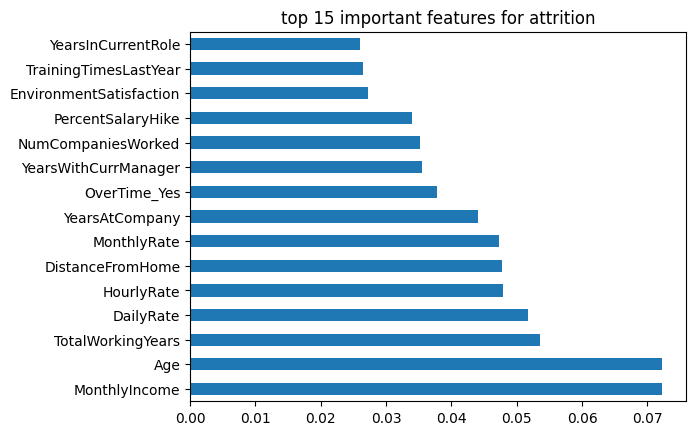

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title('top 15 important features for attrition')
plt.show()

# SUMMARY


    1. Setup: Necessary libraries (pandas, numpy, matplotlib, seaborn, sklearn) were installed.


    2. Data Loading & Initial Exploration: The HR Employee Attrition dataset was loaded into a pandas DataFrame, and the head and info of the DataFrame were displayed to understand its structure and content.

    3. Feature Engineering: Irrelevant columns (EmployeeNumber, StandardHours, Over18, EmployeeCount) were dropped, and categorical features were converted to numerical representations using one-hot encoding.

    4. Train-Test Split: The data was split into training and testing sets for model evaluation.

    5. Model Training & Evaluation: A RandomForestClassifier model was trained on the processed data, and its performance was evaluated using a confusion matrix and classification report. Feature importances were also calculated and visualized.


# CONCLUSION
Based on the analysis, the Random Forest model was trained and evaluated, revealing the top 15 features influencing employee attrition through their

In [36]:
!git clone https://github.com/KiranRathod4/IBM_data_analytics.git

Cloning into 'IBM_data_analytics'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [37]:
!git init IBM_data_analytics

Reinitialized existing Git repository in /content/IBM_data_analytics/.git/


In [38]:
!git add .

fatal: not a git repository (or any of the parent directories): .git
